<h1>Lab 5 - Linear Regression</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

In [3]:
data = pd.read_csv('boston_housing.txt', sep='\s+', skiprows=49, names=columns)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7106/527180681.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('boston_housing.txt', sep='\s+', skiprows=49, names=columns)


In [69]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [23]:
y = data['MEDV'].to_numpy()
y = y.reshape(-1, 1)
x = data.drop('MEDV', axis=1).to_numpy()

In [ ]:
train_indices = pd.read_csv('train_indices.txt', header=None).to_numpy().flatten()
test_indices = pd.read_csv('test_indices.txt', header=None).to_numpy().flatten()
train_indices = train_indices - 1
test_indices = test_indices - 1

In [ ]:
x_train = x[train_indices]
y_train = y[train_indices]
x_test = x[test_indices]
y_test = y[test_indices]

In [68]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((333, 13), (333, 1), (173, 13), (173, 1))

In the given Boston housing dataset, using multiple linear regression formulation
derived in your lab session, fit a regression line to the data in order to predict the
housing price (i.e. median value of owner occupied homes (in 1000s)). And perform
following:

In [76]:
X = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
X_transpose = X.T
betas = np.linalg.inv(X_transpose @ X) @ (X_transpose @ y_train)

In [77]:
print("Coefficients:\n", betas)

Coefficients:
 [[ 3.40454378e+01]
 [-5.24893379e-02]
 [ 4.74448677e-02]
 [ 5.38552422e-02]
 [ 3.78486439e+00]
 [-1.57396571e+01]
 [ 3.76883175e+00]
 [-4.62660241e-03]
 [-1.54882312e+00]
 [ 3.28967093e-01]
 [-1.28664959e-02]
 [-8.56975746e-01]
 [ 1.16659048e-02]
 [-6.00315456e-01]]


Verify that your result is correct by using LinearRegression of sklearn library.

In [30]:
from sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [75]:
print("Regression coefficients using sklearn LinearRegression:")
print("Intercept:", model.intercept_)
print("Coefficients:\n", model.coef_.reshape(-1, 1))

Regression coefficients using sklearn LinearRegression:
Intercept: [34.04543776]
Coefficients:
 [[-5.24893379e-02]
 [ 4.74448677e-02]
 [ 5.38552422e-02]
 [ 3.78486439e+00]
 [-1.57396571e+01]
 [ 3.76883175e+00]
 [-4.62660241e-03]
 [-1.54882312e+00]
 [ 3.28967093e-01]
 [-1.28664959e-02]
 [-8.56975746e-01]
 [ 1.16659048e-02]
 [-6.00315456e-01]]


II. Evaluate your model on the test set using appropriate metrics and comment on it.

In [78]:
y_pred = betas[0] + betas[1]*x_test[:, 0] + betas[2]*x_test[:, 1] + betas[3]*x_test[:, 2] + betas[4]*x_test[:, 3] + betas[5]*x_test[:, 4] + betas[6]*x_test[:, 5] + betas[7]*x_test[:, 6] + betas[8]*x_test[:, 7] + betas[9]*x_test[:, 8] + betas[10]*x_test[:, 9] + betas[11]*x_test[:, 10] + betas[12]*x_test[:, 11] + betas[13]*x_test[:, 12]
y_pred = y_pred.reshape(-1, 1)
np.hstack((y_test, y_pred))

array([[34.7       , 30.59959405],
       [28.7       , 25.10045908],
       [27.1       , 18.15899329],
       [16.5       ,  9.30347646],
       [18.9       , 17.68972915],
       [17.5       , 16.65182092],
       [18.2       , 18.51882129],
       [15.6       , 15.23793478],
       [13.9       , 12.77539026],
       [16.6       , 15.09480043],
       [18.4       , 19.32857545],
       [21.        , 20.7603967 ],
       [13.2       ,  7.25650407],
       [13.1       , 13.675262  ],
       [18.9       , 23.76968476],
       [20.        , 22.16124319],
       [21.        , 23.23698123],
       [26.6       , 28.24020488],
       [14.4       ,  6.95192158],
       [25.        , 27.57212726],
       [19.6       , 20.94591814],
       [22.2       , 23.88416113],
       [20.9       , 20.51730788],
       [21.7       , 21.71863158],
       [21.2       , 20.92650021],
       [20.3       , 22.50487235],
       [24.8       , 26.03767504],
       [22.        , 27.13701546],
       [22.9       ,

In [79]:
#Mean Absolute error
residuals = y_test - y_pred
abs_error = np.sum(np.abs(residuals)/len(y_test))
print("Mean absolute error:", abs_error)

Mean absolute error: 3.5835104910920004


In [80]:
#RMSE error
mse_error = np.sum(residuals ** 2) / len(residuals)
rmse_error = np.sqrt(mse_error)
print('Mean squared error:', mse_error)
print('Root mean squared error:', rmse_error)

Mean squared error: 22.739988432611415
Root mean squared error: 4.768646394167995


The Root Mean Squared Error (RMSE) of 4.77 indicates that, on average, the model's predictions deviate from the actual values by approximately 4.77 units. The Mean Absolute Error (MAE) of 3.58 shows that the model's predictions, on average, are off by about 3.58 units, without considering the direction of the error. The relatively larger RMSE suggests that there may be a few larger prediction errors i.e outliers, contributing more to the RMSE value than to the MAE.

In [118]:
data_train = np.concatenate((x_train, y_train), axis=1)
data_test = np.concatenate((x_test, y_test), axis=1)

In [82]:
#Correlation coefficient
df = pd.DataFrame(data_train, columns=columns)
df.corr()['MEDV']

CRIM      -0.407454
ZN         0.344842
INDUS     -0.473932
CHAS       0.204390
NOX       -0.413054
RM         0.689598
AGE       -0.358888
DIS        0.249422
RAD       -0.352251
TAX       -0.448078
PTRATIO   -0.481376
B          0.336660
LSTAT     -0.738600
MEDV       1.000000
Name: MEDV, dtype: float64

RM has a strong positive correlation with housing prices, while LSTAT shows a strong negative correlation with prices. Other features like TAX, NOX, and CRIM are negatively correlated with prices, suggesting that higher values in these features tend to lower housing prices. ZN and CHAS show moderate positive correlations.

In [83]:
#R-squared (R²) value
print("R-squared: ", model.score(x_train, y_train))

R-squared:  0.7331394355527803


An R-squared value of 0.733 means that approximately 73.3% of the variance in the dependent variable (housing prices, MEDV) is explained by the independent variables (the features such as CRIM, ZN, RM, etc.)

III. Choose any appropriate data point values of your liking, except these: 
            CRIM =  0.002 * (your_roll_number)
            NOX = 0.005 * your_roll_number + 0.35 
            DIS = 1 + 0.1 * your_roll_number
            TAX = 200 + 3* your_roll_number
            RAD = (your_roll_number mod 2)
            AND predict the median housing price for it. 

In [84]:
roll_number = 48

CRIM =  0.002 * (roll_number)
NOX = 0.005 * roll_number + 0.35 
DIS = 1 + 0.1 * roll_number
TAX = 200 + 3* roll_number
RAD = (roll_number % 2)
ZN = data['ZN'].mean()
INDUS = data['INDUS'].mean()
CHAS = data['CHAS'].mean()
RM = data['RM'].mean()
AGE = data['AGE'].mean()
PTRATIO = data['PTRATIO'].mean()
B = data['B'].mean()
LSTAT = data['LSTAT'].mean()

In [87]:
my_data = np.array([CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]).reshape(1, -1)
my_y_pred = model.predict(my_data)
print("My data:\n", my_data)
print("Predicted value for my data:", my_y_pred)

My data:
 [[9.60000000e-02 1.13636364e+01 1.11367787e+01 6.91699605e-02
  5.90000000e-01 6.28463439e+00 6.85749012e+01 5.80000000e+00
  0.00000000e+00 3.44000000e+02 1.84555336e+01 3.56674032e+02
  1.26530632e+01]]
Predicted value for my data: [[16.86308342]]


V. Plot residual plot for any two independent variable of your choice and comment on the plot.

In [116]:
def plot(x, y, x_label, y_label = "Residuals"):
    plt.title(f"{x_label} vs {y_label} \n Nayan Khusu 080BCT048 ",fontsize=15)
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

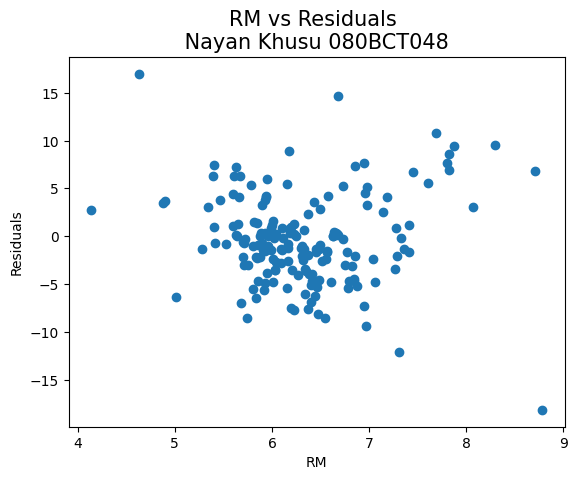

In [124]:
plot(x_test[:,5].reshape(-1,1), residuals, "RM")

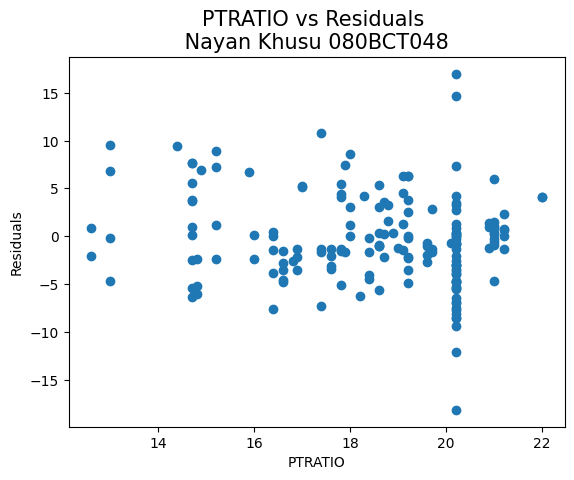

In [131]:
plot(x_test[:,10], residuals, "PTRATIO", "Residuals")

Through the plot it is seen that the data is randomly distrubted and does not show any close relationship